In [4]:
import seaborn as sns
sns.set(style="whitegrid")
from collections import Counter
from random import randint
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Data and view samples**

In [5]:
import pandas as pd
import numpy as np

In [6]:
import os
if not os.path.exists("/content/football_data_clean2.csv"):
    os.symlink("/content/drive/My Drive/DataAnalytics/Clustering_Football/football_data_clean2.csv","/content/football_data_clean2.csv") 

In [7]:
df=pd.read_csv('football_data_clean2.csv')
df.head()

,Unnamed: 0,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,31,94,94,110500000.0,565000.0,5.0,4.0,4.0,10.0,67.0,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,33,94,94,77000000.0,405000.0,5.0,4.0,5.0,7.0,74.0,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,26,92,93,118500000.0,290000.0,5.0,5.0,5.0,10.0,69.0,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,27,91,93,72000000.0,260000.0,4.0,3.0,1.0,1.0,76.0,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,27,91,92,102000000.0,355000.0,4.0,5.0,4.0,7.0,71.0,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [8]:
df.columns

Index(['Unnamed: 0', 'Age', 'Overall', 'Potential', 'Value', 'Wage',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [9]:
numerical_cols_dict={}

for i,col_name in enumerate(df.columns[1:]):
  numerical_cols_dict[col_name]=i
numerical_cols_dict  

{'Acceleration': 21,
 'Age': 0,
 'Aggression': 31,
 'Agility': 23,
 'Balance': 25,
 'BallControl': 20,
 'Composure': 36,
 'Crossing': 11,
 'Curve': 17,
 'Dribbling': 16,
 'FKAccuracy': 18,
 'Finishing': 12,
 'GKDiving': 40,
 'GKHandling': 41,
 'GKKicking': 42,
 'GKPositioning': 43,
 'GKReflexes': 44,
 'HeadingAccuracy': 13,
 'Height': 9,
 'Interceptions': 32,
 'International Reputation': 5,
 'Jersey Number': 8,
 'Jumping': 27,
 'LongPassing': 19,
 'LongShots': 30,
 'Marking': 37,
 'Overall': 1,
 'Penalties': 35,
 'Positioning': 33,
 'Potential': 2,
 'Reactions': 24,
 'ShortPassing': 14,
 'ShotPower': 26,
 'Skill Moves': 7,
 'SlidingTackle': 39,
 'SprintSpeed': 22,
 'Stamina': 28,
 'StandingTackle': 38,
 'Strength': 29,
 'Value': 3,
 'Vision': 34,
 'Volleys': 15,
 'Wage': 4,
 'Weak Foot': 6,
 'Weight': 10}

**Nromalize the data**

In [10]:
numerical_cols = [cname for cname in df.columns[1:] if  df[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
X_data = df[numerical_cols].copy()
X_data.shape

from sklearn.preprocessing import normalize
X_data = normalize(X_data)

**Applying PCA for dimensionality reduction**

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
X_data_pca = pca.fit_transform(X_data)

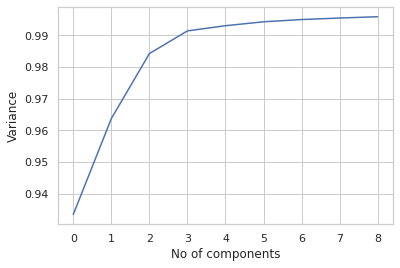

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of components')
plt.ylabel('Variance');

# **Analysis of clusters**

**1. How good are the clusters? Use intra-class similarity and inter-class similarity to measure the goodness of clusters.**

Consider the naive example for this purpose with 200 samples and 6 clusters

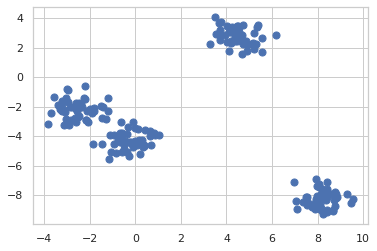

In [13]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=2489)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

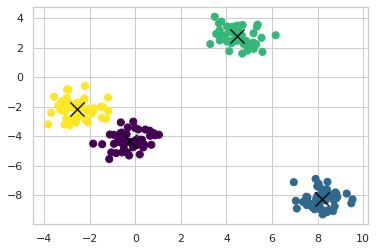

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.9,marker='x');

*How good are the clusters? Use intra-class similarity and inter-class similarity to measure the goodness of clusters.*

Generally if ground-truth labels are given , the below measures can be used for assessing the quality of the clusters formed.
*   Adjusted Rand index
*   Mutual Information based scores
*   Homogeneity, completeness and V-measure
*   Fowlkes-Mallows scores

In the absence of ground-truth labels , quality measures are derived form within the model using the below measures
*   **Silhouette Coefficient**
*   Calinski-Harabasz Index
*   Davies-Bouldin Index

 Intra-class similarity and inter-class similarity are used in *Silhouette Coefficient*

Silhouette Coefficient **s = (b-a)/max(a,b)**

*  **a**: The mean distance between a sample and all other points in the same class.
*  **b**: The mean distance between a sample and all other points in the next nearest cluster.

In [16]:
from sklearn import metrics
metrics.silhouette_score(X, y_kmeans, metric='euclidean')

0.766108049843016

* s= -1  Incorrect clustering
* s= +1  Highly dense clustering
* s=  0  Overlapping clusters

In the given sample with 4 clusters s=0.76 indicates dense clustering.
Since the clusters are spherical ,silhouette scoring is giving better score for KMeans than SpectralClutering as shown below.

**2. Which attributes are the most similar in a cluster?**

*Which attributes are the most similar in a cluster?*

*   Within class distance is minimum .Distance measure can be.
 *    1.1   Euclidean /L2-norm
 *    1.2   Manhattan /L1-norm
 *    1.3   Cosine similarity
 *    1.4   Minkowski
 *    1.5   Hamming ,eg:-Word similairty

*   Within a convex hull defined by points of the cluster
*   Have a common mean/centroid



If we consider the below selected atheletic features, how do we come up with a single attribute(distance) that represents the similairity between the two rows?

In [17]:
numerical_cols_dict

columns_athletic=['Age','Agility','Height', 'Weight','Stamina','SprintSpeed','Vision']
df_athletic=df[columns_athletic]

df_athletic.head()

,Age,Agility,Height,Weight,Stamina,SprintSpeed,Vision
0,31,91.0,67.0,159.0,72.0,86.0,94.0
1,33,87.0,74.0,183.0,88.0,91.0,82.0
2,26,96.0,69.0,150.0,81.0,90.0,87.0
3,27,60.0,76.0,168.0,43.0,58.0,68.0
4,27,79.0,71.0,154.0,90.0,76.0,94.0


In [18]:
import os
if not os.path.exists("/content/football_data_clean1.csv"):
    os.symlink("/content/drive/My Drive/DataAnalytics/Clustering_Football/football_data_clean1.csv","/content/football_data_clean1.csv") 

df1=pd.read_csv('football_data_clean1.csv')    
df1.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,67.0,159.0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,74.0,183.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,69.0,150.0,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,76.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,71.0,154.0,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


For each different country find the potential

In [19]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

df1.sort_values(['Overall'], ascending=[False])
countries=list(df1.Nationality)

req_cols=['Nationality','Overall','Age','Agility','Height', 'Weight','Stamina','SprintSpeed','Vision']

# Keep selected columns only
df1 = df1[req_cols].copy()

In [20]:
df1.head(10)

,Nationality,Overall,Age,Agility,Height,Weight,Stamina,SprintSpeed,Vision
0,Argentina,94,31,91.0,67.0,159.0,72.0,86.0,94.0
1,Portugal,94,33,87.0,74.0,183.0,88.0,91.0,82.0
2,Brazil,92,26,96.0,69.0,150.0,81.0,90.0,87.0
3,Spain,91,27,60.0,76.0,168.0,43.0,58.0,68.0
4,Belgium,91,27,79.0,71.0,154.0,90.0,76.0,94.0
5,Belgium,91,27,95.0,68.0,163.0,83.0,88.0,89.0
6,Croatia,91,32,93.0,68.0,146.0,89.0,72.0,92.0
7,Uruguay,91,31,82.0,72.0,190.0,90.0,75.0,84.0
8,Spain,91,32,78.0,72.0,181.0,84.0,75.0,63.0
9,Slovenia,90,25,67.0,74.0,192.0,41.0,60.0,70.0


Each country has 47 columns giving details of athletics profile of their players. Our job is to come up with a single number that summarizes how similar two countries are.

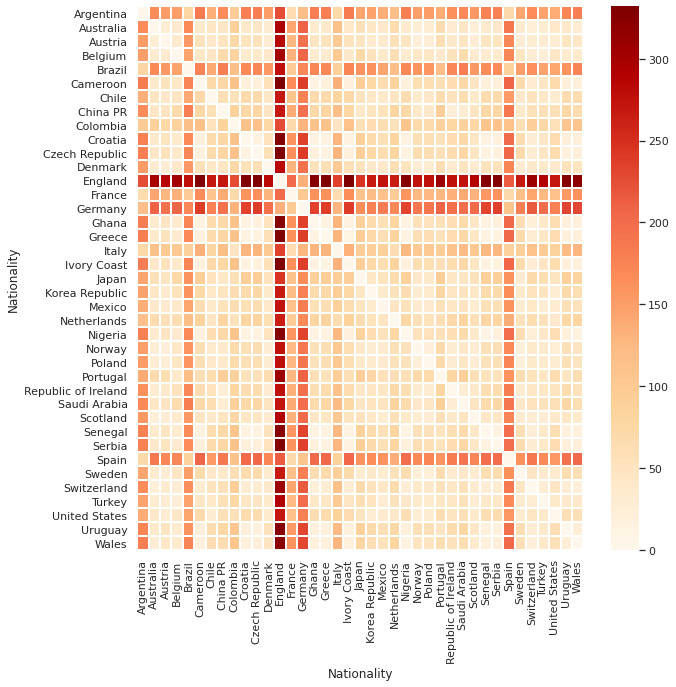

In [22]:
# make summary table for just top countries
top_countries = (
    df1
    .groupby('Nationality')
    .filter(lambda x : len(x) > 85)
    .groupby(['Nationality', 'Overall'])
    .size()
    .unstack()
    .fillna(0)
    )

# make pairwise distance matrix
pairwise_top = pd.DataFrame(
    squareform(pdist(top_countries)),
    columns = top_countries.index,
    index = top_countries.index
)

# plot it with seaborn
plt.figure(figsize=(10,10))
sns.heatmap(
    pairwise_top,
    cmap='OrRd',
    linewidth=1
)

**3. Can these clusters be named according to mean of attributes present in each cluster like Forwords, Midfielders and Defenders ?**

Yes

In [23]:
df1=pd.read_csv('football_data_clean1.csv')    
df1.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,67.0,159.0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,74.0,183.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,69.0,150.0,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,76.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,71.0,154.0,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [24]:
pca = PCA(n_components=2)
X_data_pca = pca.fit_transform(X_data)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_data_pca)
labels = kmeans.predict(X_data_pca)
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

df_pca=pd.DataFrame(X_data_pca.copy())

Reduced dimension to 9 from ~80 features with above 99% variance retention 

In [25]:
df_pca['cluster'] = clusters
df_pca['name'] = df1.Name
df_pca.columns = ['x', 'y', 'cluster', 'name']
df_pca.head()

,x,y,cluster,name
0,-0.018706,-0.001325,0,L. Messi
1,-0.018702,-0.001201,0,Cristiano Ronaldo
2,-0.018757,-0.003585,0,Neymar Jr
3,-0.018735,-0.002598,0,De Gea
4,-0.018737,-0.002710,0,K. De Bruyne


In [26]:
df_pca.cluster.unique()

array([0, 1, 2])

In [27]:
df1.sort_values(['Overall'], ascending=[False])
df1.Name[:100]

0              L. Messi
1     Cristiano Ronaldo
2             Neymar Jr
3                De Gea
4          K. De Bruyne
            ...        
95           J. Boateng
96             A. Vidal
97           I. Perišić
98             E. Džeko
99           S. Khedira
Name: Name, Length: 100, dtype: object

<Figure size 864x576 with 0 Axes>

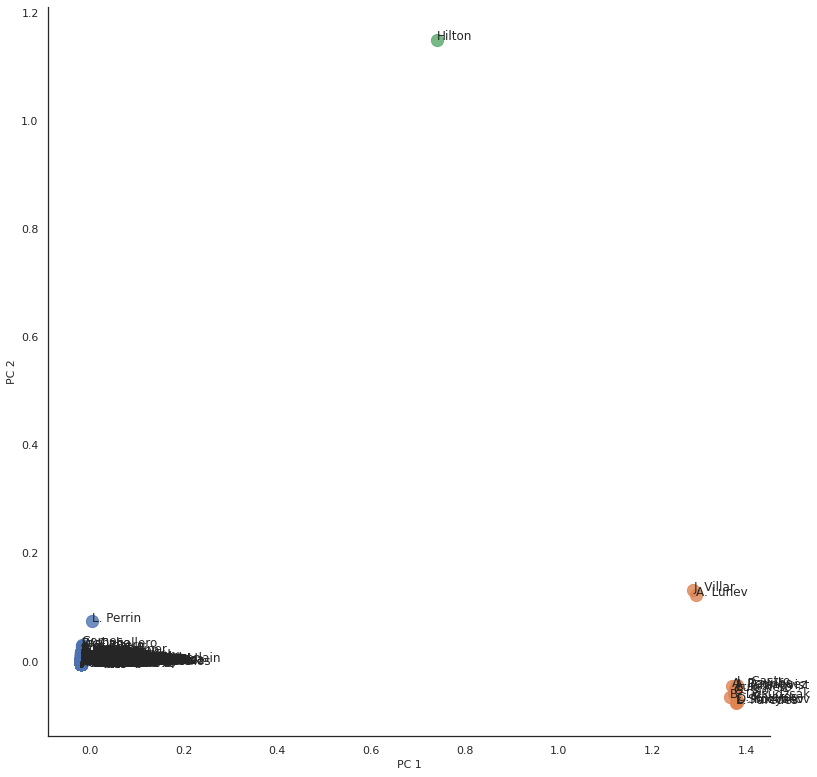

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="white")
plt.figure(figsize=(12,8))
df_pca=df_pca[df_pca['name'].isin(df1.Name[:1500])]
ax = sns.lmplot(x="x", y="y", hue='cluster', data = df_pca, legend=False,fit_reg=False, size = 11, scatter_kws={"s": 150})
texts = []
for x, y, s in zip(df_pca.x, df_pca.y, df_pca.name):
	texts.append(plt.text(x, y, s))

plt.xlabel("PC 1", fontsize = 11)
plt.ylabel("PC 2", fontsize = 11)
plt.show()

In [29]:
df_pca[df_pca['cluster']==2]

,x,y,cluster,name
864,0.741309,1.148537,2,Hilton


It can be observed that 3 clusters can be named after theier means.

Eg:- Hilton - Defender
Villar -Midfielder
Perrin - Centre-Back

**Are there any outliers? If any, then what do you interpret from those outliers. Which attributes were dierent in them?**

DBSCAN is sensitive outliers. Therfore we can use it to detect outliers.

* Core Points
* Border Point
* Noise/Outlier which is neither core point or border points

In [30]:
from sklearn.cluster import DBSCAN

# Compute DBSCAN
db = DBSCAN(eps=0.0075, min_samples=4).fit(X_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 249


In [31]:
df1.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,67.0,159.0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,74.0,183.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,69.0,150.0,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,76.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,71.0,154.0,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [32]:
_names=df1.Name
_nationality=df1.Nationality
columns_athletic=['Age','Agility','Height', 'Weight','Stamina','SprintSpeed','Vision']
df_athletic=df[columns_athletic]
df_athletic.head()

,Age,Agility,Height,Weight,Stamina,SprintSpeed,Vision
0,31,91.0,67.0,159.0,72.0,86.0,94.0
1,33,87.0,74.0,183.0,88.0,91.0,82.0
2,26,96.0,69.0,150.0,81.0,90.0,87.0
3,27,60.0,76.0,168.0,43.0,58.0,68.0
4,27,79.0,71.0,154.0,90.0,76.0,94.0


In [33]:
# Keep selected columns only
X_data = df_athletic.copy()
X_data = normalize(X_data)

pca = PCA(n_components=2)
X_data_pca = pca.fit_transform(X_data)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_data_pca)
labels = kmeans.predict(X_data_pca)
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

df_pca=pd.DataFrame(X_data_pca.copy())
df_pca['cluster'] = clusters
df_pca['name'] = df1.Name
df_pca['nationality'] = df1.Nationality
df_pca.columns = ['x', 'y', 'cluster', 'name','nationality']
df_pca.head()

,x,y,cluster,name,nationality
0,-0.176052,0.106415,2,L. Messi,Argentina
1,-0.121797,0.023683,2,Cristiano Ronaldo,Portugal
2,-0.219573,0.063559,2,Neymar Jr,Brazil
3,0.043018,0.105288,1,De Gea,Spain
4,-0.178021,0.077548,2,K. De Bruyne,Belgium


<Figure size 576x432 with 0 Axes>

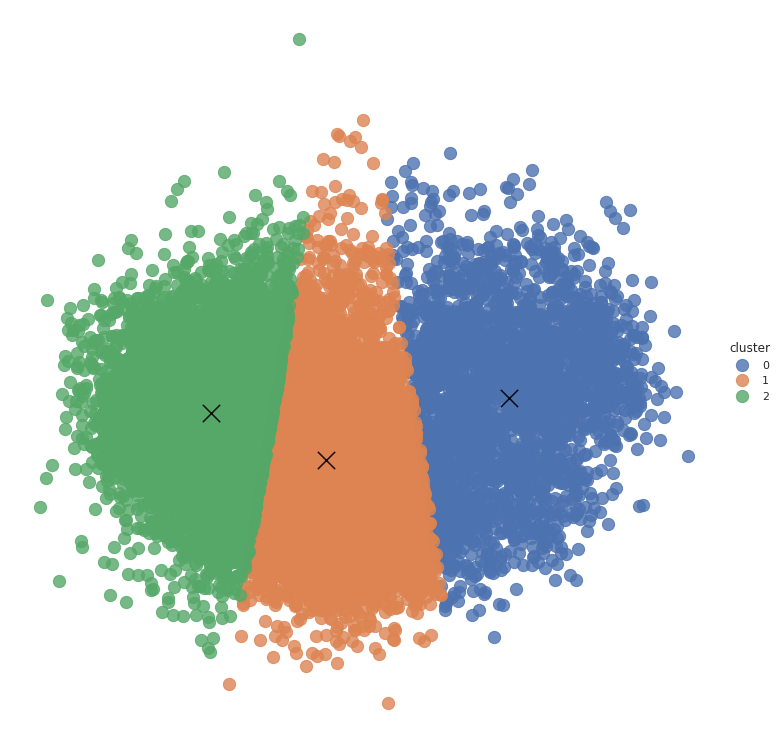

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="white")
plt.figure(figsize=(8,6))

ax = sns.lmplot(x="x", y="y", hue='cluster', data = df_pca, legend=True,fit_reg=False, size = 11, scatter_kws={"s": 150})

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=300, alpha=0.9,marker='x');
plt.axis('off')
plt.xlabel("PC 1", fontsize = 11)
plt.ylabel("PC 2", fontsize = 11)
plt.show()

In [35]:
df_athletic['cluster']=clusters
df_athletic.head()

,Age,Agility,Height,Weight,Stamina,SprintSpeed,Vision,cluster
0,31,91.0,67.0,159.0,72.0,86.0,94.0,2
1,33,87.0,74.0,183.0,88.0,91.0,82.0,2
2,26,96.0,69.0,150.0,81.0,90.0,87.0,2
3,27,60.0,76.0,168.0,43.0,58.0,68.0,1
4,27,79.0,71.0,154.0,90.0,76.0,94.0,2


In [36]:
df_athletic[df_athletic['cluster']==2].describe()

,Age,Agility,Height,Weight,Stamina,SprintSpeed,Vision,cluster
count,8667.000000,8667.000000,8667.00000,8667.000000,8667.000000,8667.000000,8667.000000,8667.0
mean,25.052498,74.290181,69.73751,156.414446,70.604823,73.457367,62.142033,2.0
std,4.225431,7.797438,2.07948,11.477857,10.545843,8.714614,9.548630,0.0
min,16.000000,44.000000,61.00000,110.000000,30.000000,33.000000,26.000000,2.0
25%,22.000000,69.000000,69.00000,150.000000,65.000000,68.000000,56.000000,2.0
50%,25.000000,74.000000,70.00000,157.000000,71.000000,74.000000,63.000000,2.0
75%,28.000000,79.000000,71.00000,165.000000,78.000000,79.000000,69.000000,2.0
max,41.000000,96.000000,77.00000,196.000000,96.000000,96.000000,94.000000,2.0


In [37]:
df_athletic[df_athletic['cluster']==2].describe().loc[['min','max','mean']]

,Age,Agility,Height,Weight,Stamina,SprintSpeed,Vision,cluster
min,16.000000,44.000000,61.00000,110.000000,30.000000,33.000000,26.000000,2.0
max,41.000000,96.000000,77.00000,196.000000,96.000000,96.000000,94.000000,2.0
mean,25.052498,74.290181,69.73751,156.414446,70.604823,73.457367,62.142033,2.0


In [38]:
df_athletic[df_athletic['cluster']==1].describe().loc[['min','max','mean']]

,Age,Agility,Height,Weight,Stamina,SprintSpeed,Vision,cluster
min,16.000000,28.000000,64.000000,121.000000,23.000000,29.000000,12.000000,1.0
max,45.000000,86.000000,79.000000,216.000000,93.000000,92.000000,85.000000,1.0
mean,24.655805,59.108616,72.302657,171.594599,64.143402,63.358432,48.476736,1.0


In [39]:
df_athletic[df_athletic['cluster']==0].describe().loc[['min','max','mean']]

,Age,Agility,Height,Weight,Stamina,SprintSpeed,Vision,cluster
min,16.000000,14.000000,67.000000,132.000000,12.000000,12.000000,10.000000,0.0
max,44.000000,70.000000,81.000000,243.000000,86.000000,84.000000,77.000000,0.0
mean,26.532808,39.661792,74.238095,182.742782,36.873266,39.846644,37.620547,0.0
